# Cargamos librerías

In [177]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from IPython.display import clear_output
from sklearn.utils import shuffle
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [112]:
num_to_word={0:"Desgaste moderado",1:"Desgaste Severo"}

## Lectura del dataset A

In [142]:
def cropping_method_4(image):
    x,y,z = image.shape
    image1= image[0:x//2, 0:y//2, :]
    image2= image[x//2:x, 0:y//2, :]
    image3= image[0:x//2, y//2:y, :]
    image4= image[x//2:x, y//2:y, :]
    return image1, image2, image3, image4

In [143]:
def read_directory_dataset():
    cutoff_parameter = 420
    base_path = "../Dataset/Dataset_A/"
    class_moderado = "Moderado/"
    class_severo = "Severo/"
    path_moderado_list = os.listdir(base_path+class_moderado)
    path_severo_list = os.listdir(base_path+class_severo)
    moderado_images_list = []
    severo_images_list = []
    for file in path_moderado_list:
        image_path = "{}{}{}".format(base_path,class_moderado,file)
        print(image_path)
        image = cv2.imread(image_path)
        print(image.shape)
        image = image[0:cutoff_parameter,:,:]
        image1, image2, image3, image4 = cropping_method_4(image)
        moderado_images_list.append(image1)
        moderado_images_list.append(image2)
        moderado_images_list.append(image3)
        moderado_images_list.append(image4)
    print("======================================================")
    for file in path_severo_list:
        image_path = "{}{}{}".format(base_path,class_severo,file)
        print(image_path)
        image = img_bgr = cv2.imread(image_path)
        image = image[0:cutoff_parameter,:,:]
        image1, image2, image3, image4 = cropping_method_4(image)
        severo_images_list.append(image1)
        severo_images_list.append(image2)
        severo_images_list.append(image3)
        severo_images_list.append(image4)
        
    
    
    severo_images_array = np.array(severo_images_list)
    moderado_images_array = np.array(moderado_images_list)
    del severo_images_list, moderado_images_list
    clear_output()
    return severo_images_array, moderado_images_array

In [144]:
X_severo, X_moderado = read_directory_dataset()

In [145]:
def generate_X_Y(X_severo, X_moderado):
    severo_number_samples = len(X_severo)
    moderado_number_samples = len(X_moderado)
    print(X_severo.shape, X_moderado.shape)
    X = np.vstack((X_severo,X_moderado))
    Y = np.zeros((severo_number_samples + moderado_number_samples))
    Y[0:severo_number_samples] = 1
    return X, Y

### Generamos X y Y, luego barajamos!

In [166]:
X,Y = generate_X_Y(X_severo, X_moderado)
X, Y = shuffle(X, Y, random_state=0)

(116, 210, 356, 3) (84, 210, 356, 3)


### Plot a sample with matplotlib and interact function!

In [147]:
def plot_a_sample(i, X, Y):
    plt.figure(figsize=(7,7))
    image = X[i]
    category = num_to_word[Y[i]]
    plt.imshow(image)
    plt.title(category)
    plt.grid()

In [149]:
interact_manual(plot_a_sample,X=fixed(X), Y = fixed(Y), i= widgets.IntSlider(min=0, max=len(X)-1, step=1, value=10))

interactive(children=(IntSlider(value=10, description='i', max=199), Button(description='Run Interact', style=…

<function __main__.plot_a_sample(i, X, Y)>

### All the labels together! X are all your images and Y are all your labels!

In [150]:
Y

array([1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0.])

In [153]:
Y[Y==1].shape

(116,)

In [154]:
Y[Y==0].shape

(84,)

In [170]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)
s,x,y,z = X_train.shape
num_classes = 2

### Let's go deeper!

In [190]:
def leNet():
    from keras.models import Sequential
    from keras.layers import InputLayer, Input
    from keras.layers import Reshape, MaxPooling2D,AveragePooling2D, Average
    from keras.layers import Conv2D, Dense, Flatten, Dropout, BatchNormalization, Activation
    import keras.backend as K
    from keras.utils import to_categorical
    import tensorflow as tf
    from keras.optimizers import Adam
    from keras import metrics
    
    img_shape_full = (x,y,z)
    
    optimizer = Adam(lr=1e-3)
    model = Sequential()
    model.add(InputLayer(input_shape=(img_shape_full)))
    model.add(Conv2D(filters=6, kernel_size=(3, 3), kernel_initializer='random_uniform',
                bias_initializer='zeros'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(AveragePooling2D(pool_size=2, strides=2))
    model.add(Conv2D(filters=16, kernel_size=(3, 3),kernel_initializer='random_uniform',
                bias_initializer='zeros'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(AveragePooling2D( pool_size=2, strides=2))
    model.add(Flatten())      
    model.add(Dense(units=120, kernel_initializer='random_uniform',
                bias_initializer='zeros'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dense(units=84, kernel_initializer='random_uniform',
                bias_initializer='zeros'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dense(num_classes, name = 'Prob', kernel_initializer='random_uniform',
                bias_initializer='zeros',activation = 'softmax'))
    #model.save_weights('leNet_w.h5')
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                 metrics = [metrics.binary_accuracy])
    return model

model = leNet()
model.summary()
#plot_model(model,to_file='LeNet_BatchNormalization.png',show_shapes=True)
model.save_weights("unimodal_weights.h5")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 208, 354, 6)       168       
_________________________________________________________________
batch_normalization_33 (Batc (None, 208, 354, 6)       24        
_________________________________________________________________
activation_33 (Activation)   (None, 208, 354, 6)       0         
_________________________________________________________________
average_pooling2d_17 (Averag (None, 104, 177, 6)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 102, 175, 16)      880       
_________________________________________________________________
batch_normalization_34 (Batc (None, 102, 175, 16)      64        
_________________________________________________________________
activation_34 (Activation)   (None, 102, 175, 16)      0         
__________

In [191]:
Y_train

array([0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       1.])

In [198]:
history = model.fit(X_train,to_categorical(Y_train,num_classes), epochs=10, batch_size=16, validation_split=0.25,verbose=2)

Train on 90 samples, validate on 30 samples
Epoch 1/10
 - 15s - loss: 0.0296 - binary_accuracy: 1.0000 - val_loss: 0.7226 - val_binary_accuracy: 0.6000
Epoch 2/10
 - 16s - loss: 0.0272 - binary_accuracy: 1.0000 - val_loss: 0.7942 - val_binary_accuracy: 0.6333
Epoch 3/10
 - 17s - loss: 0.1103 - binary_accuracy: 0.9556 - val_loss: 1.6818 - val_binary_accuracy: 0.6000
Epoch 4/10
 - 19s - loss: 0.1246 - binary_accuracy: 0.9556 - val_loss: 3.9964 - val_binary_accuracy: 0.4667
Epoch 5/10
 - 18s - loss: 0.1145 - binary_accuracy: 0.9667 - val_loss: 2.5918 - val_binary_accuracy: 0.4667
Epoch 6/10
 - 17s - loss: 0.0630 - binary_accuracy: 0.9889 - val_loss: 0.7899 - val_binary_accuracy: 0.7333
Epoch 7/10
 - 18s - loss: 0.0183 - binary_accuracy: 1.0000 - val_loss: 0.3672 - val_binary_accuracy: 0.8667
Epoch 8/10
 - 18s - loss: 0.0223 - binary_accuracy: 1.0000 - val_loss: 0.1281 - val_binary_accuracy: 0.9333
Epoch 9/10
 - 17s - loss: 0.0150 - binary_accuracy: 1.0000 - val_loss: 0.0075 - val_binary_a

In [199]:
history.history

{'binary_accuracy': [1.0,
  1.0,
  0.9555555555555556,
  0.9555555555555556,
  0.9666666640175714,
  0.9888888888888889,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [0.02959557722012202,
  0.027169438203175862,
  0.11032732590619061,
  0.12462037967311011,
  0.11450639267762502,
  0.06304133468204075,
  0.01832196410331461,
  0.022265030443668364,
  0.01497650585240788,
  0.01664208360016346],
 'val_binary_accuracy': [0.6000000019868215,
  0.6333333353201548,
  0.6000000019868215,
  0.46666667858759564,
  0.46666667858759564,
  0.7333333412806193,
  0.8666666587193806,
  0.9333333214124043,
  1.0,
  0.800000007947286],
 'val_loss': [0.7225986003875733,
  0.7942001660664876,
  1.6818123976389567,
  3.9963945547739663,
  2.5917570273081463,
  0.7899070739746094,
  0.3672430872917175,
  0.12814329465230306,
  0.007482867004970709,
  0.47490888039271034]}

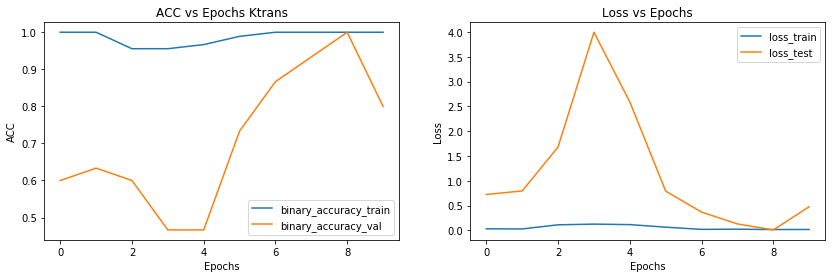

In [200]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.legend(['binary_accuracy_train', 'binary_accuracy_val'], loc='best')
plt.xlabel("Epochs")
plt.ylabel("ACC")
plt.title("ACC vs Epochs Ktrans")
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss_train', 'loss_test'], loc='best')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.show()